In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles

from dojo.nn import NeuralNetwork
from dojo.nn.layers import Dense
from dojo.regularizers import L2

## Load the dataset

In [2]:
X, y = make_circles(n_samples=500, noise=0.15, factor=0.3)

assert len(X) == len(y)

## Quick EDA

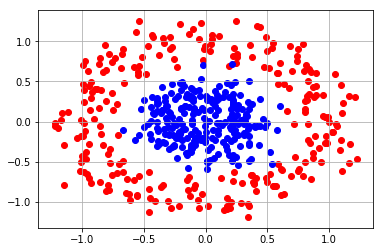

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

plt.grid()
plt.show();

# Build the Neural Network

In [11]:
M, N_INPUTS = X.shape
model = NeuralNetwork(alpha=0.003, n_iterations=20_000)

model.add(Dense(32, n_inputs=N_INPUTS, activation="relu", regularizer=L2(.01)))
model.add(Dense(20, activation="relu", regularizer=L2(.01)))
model.add(Dense(1, activation="sigmoid", regularizer=L2(.01)))

## Training

In [12]:
model.fit(X, y)

NeuralNetwork(
    alpha=0.003,
    n_iterations=20000,
    loss=<dojo.losses.CrossEntropy object at 0x119e00320>,
    verbose=False,
)

## Learning Curve

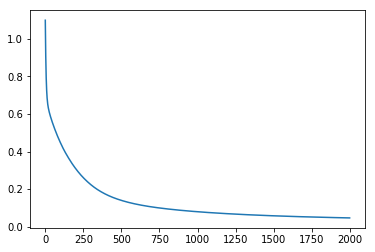

In [13]:
plt.plot(model._loss_values[::10]);

## Evaluate

In [14]:
model.evaluate(X, y)

0.99

In [15]:
def plot_decision_boundry(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show();

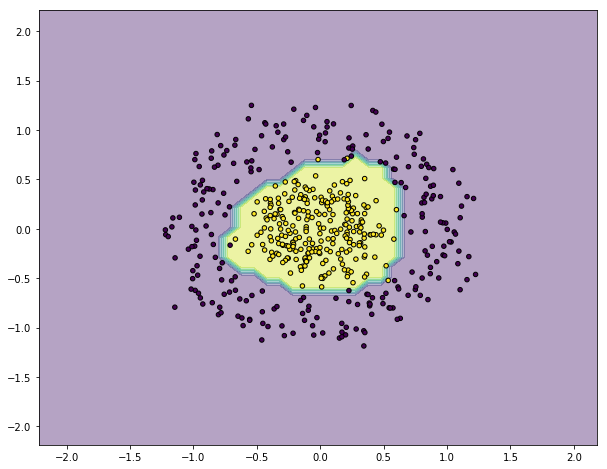

In [16]:
plot_decision_boundry(model, X, y)